In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
import os
import pickle
from tqdm.notebook import tqdm
import shelve

from inspector.app.utils import get_feature_values
from inspector.app.utils.model import Model
from inspector.app.views import gather_values

SEED = 25

In [2]:
df = pd.read_csv(r'D:\hse_iot\VKR\my_inspector\data\classification_dataset.csv')
df.head()

av_depth  max_depth  min_depth  num_acl  num_rel_cl  num_advcl  num_sent  \
0      3.56          6          2        2           0          1        18   
1      5.43         10          4        1           3          1         7   
2      3.81          6          0        5           0         13        16   
3      4.33          7          2        3           3          6        12   
4      4.25          5          3        2           3          0         8   

   num_tok  av_tok_before_root  av_len_sent  ...  punct_mistakes_because  \
0      244                4.39        13.56  ...                       0   
1      175                6.29        25.00  ...                       0   
2      292                4.56        18.25  ...                       0   
3      221                6.67        18.42  ...                       2   
4      160                7.12        20.00  ...                       0   

   punct_mistakes_but  punct_mistakes_compare  million_mistake  side_mistake  \
0                   0                       0                0             0   
1                   0                       0                0             0   
2                   1                       0                0             0   
3                   0                       0                0             0   
4                   1                       0                0             0   

                             name  \
0  ./data/exam/exam2017/OBy_146_1   
1   ./data/exam/exam2017/EGe_15_1   
2    ./data/exam/exam2017/DOv_2_2   
3   ./data/exam/exam2017/EGe_61_2   
4  ./data/exam/exam2017/NMya_48_1   

                                                text  class  type  sum_punct  
0  This two line graphs illustrates monthly avera...     60     1          0  
1  ﻿We have two graphics, which show us the popul...     65     1          0  
2  More and more young people are stunding on the...     60     2          1  
3  ﻿Nowdays we can notice the tendency that large...     65     2          2  
4  The graph gives information about level of une...     55     1          1  

[5 rows x 77 columns]

In [3]:
for column in df.columns:
    print('{0}: {1}'.format(column, df.iloc[0][column]))

av_depth: 3.56
max_depth: 6
min_depth: 2
num_acl: 2
num_rel_cl: 0
num_advcl: 1
num_sent: 18
num_tok: 244
av_tok_before_root: 4.39
av_len_sent: 13.56
num_cl: 9
num_tu: 8
num_compl_tu: 1
num_coord: 6
num_poss: 21
num_prep: 10
num_adj_noun: 33
num_part_noun: 1
num_noun_inf: 0
pos_sim_nei: 10.53
pos_sim_all: 10.43
lemma_sim_all: 13.14
lemma_sim_nei: 13.76
density: 0.38
ls: 0.1
vs: 0.0
corrected_vs: 0.0
squared_vs: 0.0
lfp_1000: 0.37
lfp_2000: 0.14
lfp_uwl: 0.08
lfp_rest: 0.41
ndw: 93
ttr: 0.38
corrected_ttr: 4.21
root_ttr: 5.95
log_ttr: 0.82
uber_ttr: 222.41
d: 0.75
lv: 0.38
vvi: 0.88
squared_vv: 6.12
corrected_vv: 1.75
vvii: 0.08
nv: 0.07
adjv: 0.2
advv: 0.03
modv: 0.23
der_level3: 0.07
der_level4: 0.0
der_level5: 0.07
der_level6: 0.0
mci: 3.0
freq_finite_forms: 0.5
freq_aux: 0.62
num_inf: 1
num_gerunds: 0
num_pres_sing: 4
num_pres_plur: 0
num_past_part: 2
num_past_simple: 0
num_linkings: 5
num_4grams: 1
num_func_ngrams: 0
num_shell_noun: 0
num_misspelled_tokens: 2
punct_mistakes_pp: 0
pu

In [4]:
def count_features(text):
    model = Model(r'D:\hse_iot\VKR\my_inspector\inspector\app\data\models\english-partut-ud-2.3-181115.udpipe')
    gf = get_feature_values.GetFeatures(model)
    gf.get_info(text)
    
    res = gather_values(gf)
    for feature in res:
        res[feature] = round(res[feature], 2)
    return res
    

In [5]:
features = count_features(df.iloc[0].text)
for feature in features:
    print('{0}: {1}'.format(feature, features[feature]))

av_depth: 3.5
max_depth: 6
min_depth: 2
num_acl: 2
num_rel_cl: 1
num_advcl: 1
num_sent: 18
num_tok: 244
av_tok_before_root: 4.11
av_len_sent: 13.56
num_cl: 9
num_tu: 8
num_compl_tu: 1
num_coord: 6
num_poss: 21
num_prep: 10
num_adj_noun: 34
num_part_noun: 1
num_noun_inf: 0
pos_sim_nei: 10.53
lemma_sim_nei: 13.76
pos_sim_all: 10.43
lemma_sim_all: 13.15
density: 0.5
ls: 0.35
vs: 0.0
corrected_vs: 0.0
squared_vs: 0.0
lfp_1000: 0.36
lfp_2000: 0.14
lfp_uwl: 0.08
lfp_rest: 0.42
ndw: 95
ttr: 0.39
corrected_ttr: 4.3
root_ttr: 6.08
log_ttr: 0.83
uber_ttr: 256.49
d: 0.75
lv: 0.39
vvi: 0.88
squared_vv: 6.12
corrected_vv: 1.75
vvii: 0.06
nv: 0.08
adjv: 0.15
advv: 0.02
modv: 0.17
der_level3: 0.07
der_level4: 0.0
der_level5: 0.07
der_level6: 0.0
mci: 3.0
freq_finite_forms: 0.5
freq_aux: 0.62
num_inf: 1
num_gerunds: 0
num_pres_sing: 4
num_pres_plur: 0
num_past_part: 2
num_past_simple: 0
num_linkings: 5
num_4grams: 1
num_func_ngrams: 0
sum_punct: 0
million_mistake: 0


## Генерируем тексты скомпоновав половины текстов

In [37]:
df.drop(['num_misspelled_tokens', 'num_shell_noun', 'name', 'type'],  inplace=True, axis=1)
df['class'] = round(df['class'] / 10).astype(int)

In [38]:
df['class'].value_counts()

6    2680
7     308
5     215
4     122
8      77
2      24
3      14
1       1
Name: class, dtype: int64

In [39]:
df.loc[df['class'] == 1, 'class'] = 2
df.loc[df['class'] == 3, 'class'] = 2
df.loc[df['class'] == 4, 'class'] = 3
df.loc[df['class'] == 5, 'class'] = 3
df.loc[df['class'] == 6, 'class'] = 4
df.loc[df['class'] == 7, 'class'] = 4
df.loc[df['class'] == 8, 'class'] = 5

feature_columns = [col for col in df.columns if col not in ['class',]]
X = df[feature_columns]
y = df['class']

y.value_counts()

4    2988
3     337
5      77
2      39
Name: class, dtype: int64

In [40]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = SEED)

In [41]:
train_y.value_counts()

4    2386
3     273
5      61
2      32
Name: class, dtype: int64

In [42]:
train_x[train_y == 2].num_sent.mean()

6.40625

In [8]:
def text2parts(text):
    model = Model(r'D:\hse_iot\VKR\my_inspector\inspector\app\data\models\english-partut-ud-2.3-181115.udpipe')
    sentences = model.tokenize(text)
    sentences = [i.getText() for i in sentences]
    first_part_len = len(sentences)//2
    return (''.join(sentences[:first_part_len]), ''.join(sentences[first_part_len:]))

def generate_texts(inp_texts):
    if type(inp_texts) != list:
        raise Exception("Input texts are not list")
    parts = []
    for text in inp_texts:
        parts.extend(text2parts(text))
    new_parts = combinations(parts, 2)
    res = [''.join(i) for i in new_parts]
    return res

def add_text_to_df(df, text, cls):
    features = count_features(text)
    
    data = list(features.values())
    data.append(text)
    data.append(cls)
        
    df.loc[len(df)] = data
    
    

In [44]:
X.columns

Index(['av_depth', 'max_depth', 'min_depth', 'num_acl', 'num_rel_cl',
       'num_advcl', 'num_sent', 'num_tok', 'av_tok_before_root', 'av_len_sent',
       'num_cl', 'num_tu', 'num_compl_tu', 'num_coord', 'num_poss', 'num_prep',
       'num_adj_noun', 'num_part_noun', 'num_noun_inf', 'pos_sim_nei',
       'pos_sim_all', 'lemma_sim_all', 'lemma_sim_nei', 'density', 'ls', 'vs',
       'corrected_vs', 'squared_vs', 'lfp_1000', 'lfp_2000', 'lfp_uwl',
       'lfp_rest', 'ndw', 'ttr', 'corrected_ttr', 'root_ttr', 'log_ttr',
       'uber_ttr', 'd', 'lv', 'vvi', 'squared_vv', 'corrected_vv', 'vvii',
       'nv', 'adjv', 'advv', 'modv', 'der_level3', 'der_level4', 'der_level5',
       'der_level6', 'mci', 'freq_finite_forms', 'freq_aux', 'num_inf',
       'num_gerunds', 'num_pres_sing', 'num_pres_plur', 'num_past_part',
       'num_past_simple', 'num_linkings', 'num_4grams', 'num_func_ngrams',
       'punct_mistakes_pp', 'punct_mistakes_because', 'punct_mistakes_but',
       'punct_mistakes_co

In [55]:
features = count_features(train_x[train_y == 2].text.to_list()[2])
cols = list(features.keys())
cols.append('text')
cols.append('cls')
new_data = pd.DataFrame(columns=cols)

new_texts_2 = generate_texts(train_x[train_y == 2].text.to_list())
for text in tqdm(new_texts_2):
    add_text_to_df(new_data, text, 2)
    
new_texts_3 = generate_texts(train_x[train_y == 3].text.to_list()[:32])
for text in tqdm(new_texts_3):
    add_text_to_df(new_data, text, 3)
    
new_texts_5 = generate_texts(train_x[train_y == 5].text.to_list()[:35])
for text in tqdm(new_texts_5):
    add_text_to_df(new_data, text, 5)

100%|██████████████████████████████████████████████████████████████████████████████| 2415/2415 [30:53<00:00,  1.30it/s]


In [56]:
new_data.shape

(6447, 68)

In [97]:
X = pd.concat([train_x, train_y], axis = 1)
X = X.rename(columns = {'class': 'cls'})
X_clear = X.drop(labels=train_x[train_y == 2].index, axis=0)
X_clear = X_clear.drop(labels=train_x[train_y == 3][:32].index, axis=0)
X_clear = X_clear.drop(labels=train_x[train_y == 5][:35].index, axis=0)
X_clear.shape

X_new = pd.concat([X_clear, new_data], ignore_index=True)

In [106]:
X_new.drop(['punct_mistakes_pp', 'punct_mistakes_because', 'punct_mistakes_but', 'punct_mistakes_compare', 'side_mistake'],  inplace=True, axis=1)

In [118]:
X_new.to_csv('data\\generated_data.csv', index_label='idx')

## Генерируем тексты скомпоновав предложения

In [114]:
df = pd.read_csv(r'D:\hse_iot\VKR\my_inspector\data\classification_dataset.csv')
df.drop(['num_misspelled_tokens', 'num_shell_noun', 'name', 'type'],  inplace=True, axis=1)
df['class'] = round(df['class'] / 10).astype(int)
df.head()

av_depth  max_depth  min_depth  num_acl  num_rel_cl  num_advcl  num_sent  \
0      3.56          6          2        2           0          1        18   
1      5.43         10          4        1           3          1         7   
2      3.81          6          0        5           0         13        16   
3      4.33          7          2        3           3          6        12   
4      4.25          5          3        2           3          0         8   

   num_tok  av_tok_before_root  av_len_sent  ...  num_func_ngrams  \
0      244                4.39        13.56  ...                0   
1      175                6.29        25.00  ...                0   
2      292                4.56        18.25  ...                2   
3      221                6.67        18.42  ...                3   
4      160                7.12        20.00  ...                0   

   punct_mistakes_pp  punct_mistakes_because  punct_mistakes_but  \
0                  0                       0                   0   
1                  0                       0                   0   
2                  0                       0                   1   
3                  0                       2                   0   
4                  0                       0                   1   

   punct_mistakes_compare  million_mistake  side_mistake  \
0                       0                0             0   
1                       0                0             0   
2                       0                0             0   
3                       0                0             0   
4                       0                0             0   

                                                text  class  sum_punct  
0  This two line graphs illustrates monthly avera...      6          0  
1  ﻿We have two graphics, which show us the popul...      6          0  
2  More and more young people are stunding on the...      6          1  
3  ﻿Nowdays we can notice the tendency that large...      6          2  
4  The graph gives information about level of une...      6          1  

[5 rows x 73 columns]

In [115]:
train_y.value_counts()

4    2386
3     273
5      61
2      32
Name: class, dtype: int64

In [116]:
df.loc[df['class'] == 1, 'class'] = 2
df.loc[df['class'] == 3, 'class'] = 2
df.loc[df['class'] == 4, 'class'] = 3
df.loc[df['class'] == 5, 'class'] = 3
df.loc[df['class'] == 6, 'class'] = 4
df.loc[df['class'] == 7, 'class'] = 4
df.loc[df['class'] == 8, 'class'] = 5

feature_columns = [col for col in df.columns if col not in ['class',]]
X = df[feature_columns]
y = df['class']

y.value_counts()

4    2988
3     337
5      77
2      39
Name: class, dtype: int64

In [117]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = SEED)
X = train_x[feature_columns]
y = train_y

In [118]:
y.value_counts()

4    2386
3     273
5      61
2      32
Name: class, dtype: int64

Средние длины предложений в каждом классе

In [119]:
for i in range(2, 6):
    print('class: {0}, mean_num_sent: {1}, std: {2}'.format(i, round(X[y == i].num_sent.mean(), 2), round(X[y == i].num_sent.std(), 2)))

class: 2, mean_num_sent: 6.41, std: 3.34
class: 3, mean_num_sent: 10.67, std: 4.3
class: 4, mean_num_sent: 12.73, std: 4.46
class: 5, mean_num_sent: 13.41, std: 4.75


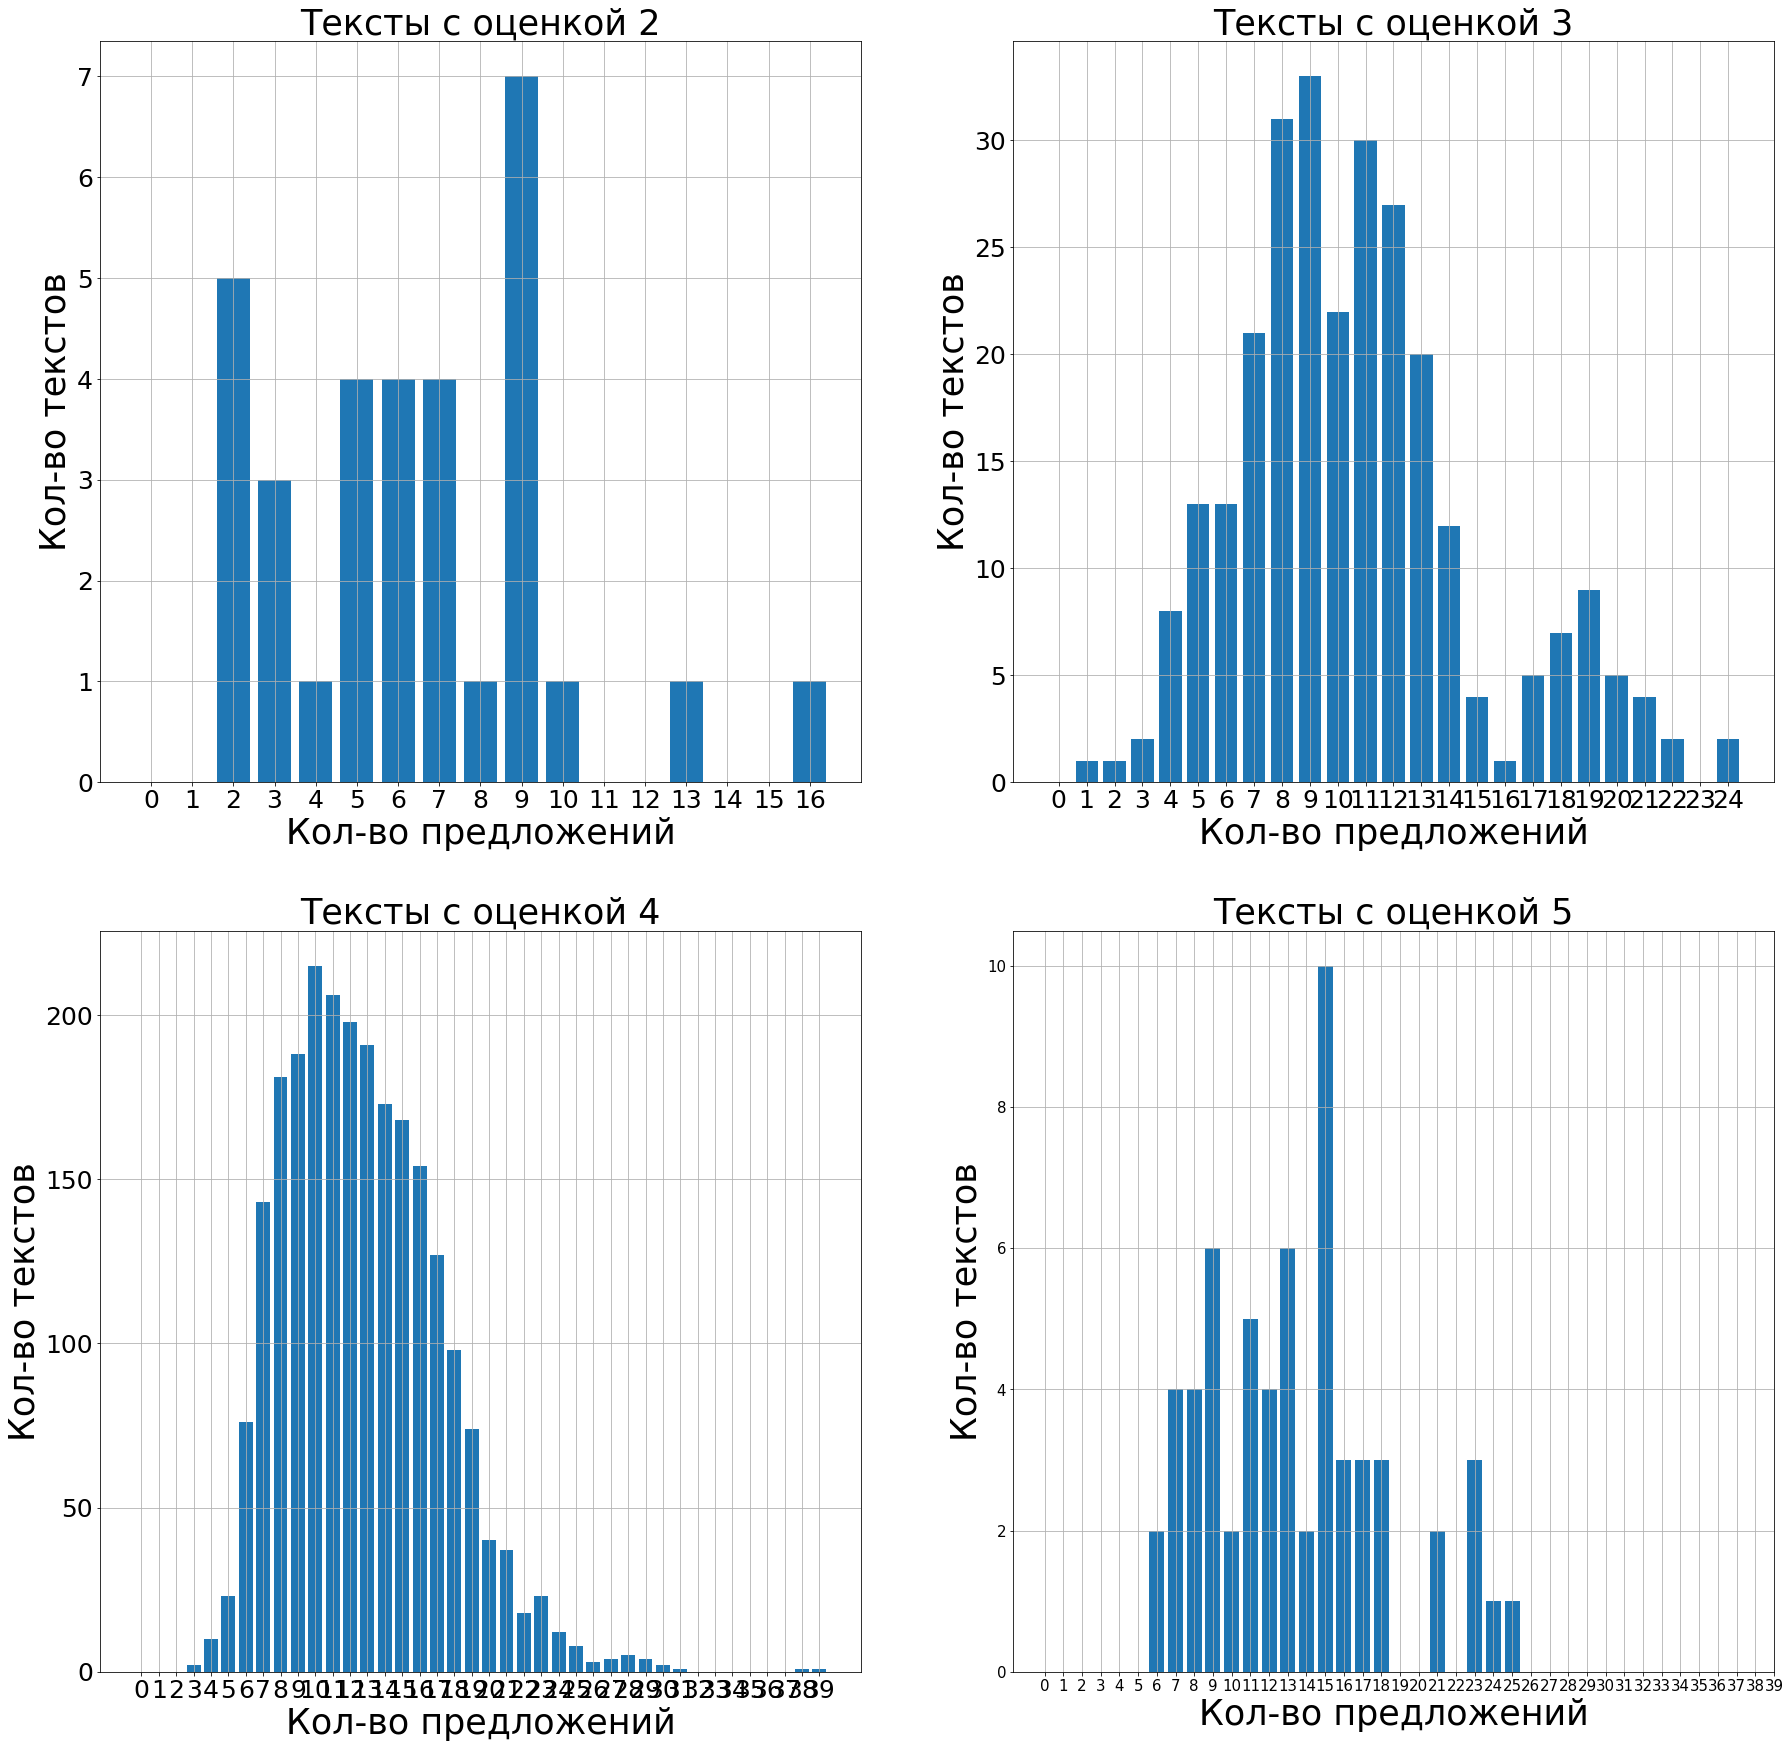

In [120]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30,30)
plt.tick_params(labelsize=50)


axs[0, 0].bar(range(max(X[y == 2].num_sent)+1), np.bincount(X[y == 2].num_sent))
axs[0, 0].set_xticks(range(max(X[y == 2].num_sent)+1))
axs[0, 0].tick_params(labelsize=25)
axs[0, 0].set_xlabel('Кол-во предложений', {'fontsize': 35})
axs[0, 0].set_ylabel('Кол-во текстов', {'fontsize': 35})
axs[0, 0].grid(True)
axs[0, 0].set_title('Тексты с оценкой 2', {'fontsize': 35})

axs[0, 1].bar(range(max(X[y == 3].num_sent)+1), np.bincount(X[y == 3].num_sent))
axs[0, 1].set_xticks(range(max(X[y == 3].num_sent)+1))
axs[0, 1].tick_params(labelsize=25)
axs[0, 1].set_xlabel('Кол-во предложений', {'fontsize': 35})
axs[0, 1].set_ylabel('Кол-во текстов', {'fontsize': 35})
axs[0, 1].grid(True)
axs[0, 1].set_title('Тексты с оценкой 3', {'fontsize': 35})

axs[1, 0].bar(range(max(X[y == 4].num_sent)+1), np.bincount(X[y == 4].num_sent))
x = range(max(X[y == 4].num_sent)+1)
axs[1, 0].set_xticks(x)
axs[1, 0].tick_params(labelsize=25)
axs[1, 0].set_xlabel('Кол-во предложений', {'fontsize': 35})
axs[1, 0].set_ylabel('Кол-во текстов', {'fontsize': 35})
axs[1, 0].grid(True)
axs[1, 0].set_title('Тексты с оценкой 4', {'fontsize': 35})

axs[1, 1].bar(range(max(X[y == 5].num_sent)+1), np.bincount(X[y == 5].num_sent))
x = range(max(X[y == 4].num_sent)+1)
axs[1, 1].set_xticks(x)
axs[1, 1].tick_params(labelsize=15)
axs[1, 1].set_xlabel('Кол-во предложений', {'fontsize': 35})
axs[1, 1].set_ylabel('Кол-во текстов', {'fontsize': 35})
axs[1, 1].grid(True)
axs[1, 1].set_title('Тексты с оценкой 5', {'fontsize': 35})

plt.show()

Проверим гипотезы о том, что распределения для каждой оценки хи-квадрат

In [747]:
def get_distr(distr_list, data):
    max_iter_nan = 5
    found_dist_fl = False
    for distr in tqdm(distr_list):
        try:
            coef = distr.fit(data, floc=0, fscale=1)
        except ValueError as err:
            if err.args[0] == 'All parameters fixed. There is nothing to optimize.' or err.args[0] == 'Iteration of zero-sized operands is not enabled':
                coef = (0, 1)
            else:
                print('distr={}'.format(distr))
                raise err
        except RuntimeError as err:
            if err.args[0] == 'All parameters fixed. There is nothing to optimize.' or err.args[0] == 'Iteration of zero-sized operands is not enabled':
                coef = (0, 1)
                coef = (0, 1)
            else:
                print('distr={}'.format(distr))
                raise err
        
        start_freq = 1
        exp_freq = [len(data)*distr.pdf(x, *coef) for x in range(start_freq, max(data) + 1)]
        res = stats.chisquare(np.bincount(data)[start_freq:], exp_freq, ddof = len(coef)-2)
        
        while res.pvalue == np.nan and start_freq <= max_iter_nan:
            print('nan_res')
            start_freq += 1
            exp_freq = [len(data)*distr.pdf(x, *coef) for x in range(start_freq, max(data) + 1)]
            res = stats.chisquare(np.bincount(data)[start_freq:], exp_freq, ddof = len(coef)-2)
        if res.pvalue > 0.05:
            print('for distr = {}, p-value = {} (coefs={})'.format(distr.name, res.pvalue, coef[:-2]))
            found_dist_fl = True
    if not found_dist_fl:
        print('Distribution not found')

In [163]:
def texts2sent(inp_texts):
    if type(inp_texts) != list:
        raise Exception("Input texts are not list")
    model = Model(r'D:\hse_iot\VKR\my_inspector\inspector\app\data\models\english-partut-ud-2.3-181115.udpipe')
    res = []
    for text in inp_texts:
        sentences = model.tokenize(text)
        sentences = [i.getText() for i in sentences]
        res.extend(sentences)
    return res

def generate_texts(inp_texts, mean_num_sent, std_num_sent, num_texts):
    if type(inp_texts) != list:
        raise Exception("Input texts are not list")
    sentences = texts2sent(inp_texts)
    # Общее количество предложений
    sent_len = len(sentences)
    
    # Вычислим длины текстов (в предложениях) (норм распределение с мат.ожиданием и ст. откл. как в оригинальных текстах)
    texts_len = [int(i) for i in stats.norm.rvs(mean_num_sent, np.sqrt(std_num_sent), num_texts, random_state=SEED)]
    
    res = []
    for text_len in texts_len:
        # Проверка на 0 длину
        if text_len == 0:
            while text_len < 1:
                text_len = int(stats.norm.rvs(mean_num_sent, np.sqrt(std_num_sent), 1))
        
        # Генерируем номера предложений (как индекс из общего списка) для каждого из текстов
        idx = [int(i) for i in sent_len*stats.uniform.rvs(size=text_len)]
        # Собираем текст
        text = ''.join([sentences[i] for i in idx])
        res.append(text)
        
    return res

In [113]:
test_data = X[y == 2]
original_texts = test_data.text.to_list()[:2]
mean = test_data.num_sent.mean()
std = test_data.num_sent.std()
res = generate_texts(original_texts, mean, std, 5)
res

['The bar chart gives information about the level of qualification between men and women, who are living in Australia.We not save nature an she is die.The bar chart gives information about the level of qualification between men and women, who are living in Australia.Sixty percentage of people who had master’s degree also were males.Overall, we can say that females rarely have a skilled vocational diploma.Air – this one part nature, air help people life… or people must have a the air for self life.Sixty percentage of people who had master’s degree also were males.',
 'Overall, we can say that females rarely have a skilled vocational diploma.Air travel has been preven to contribute greatly to air pollution and global warming.However, three quarter of people who had undergraduate diploma were females.If we see on people who had bachelor’s degree, that we can mark that differences between them was a very slight and females won the race only on 8 percentages.I agree, because health Worlds i

In [164]:
features = count_features(train_x[train_y == 2].text.to_list()[2])
cols = list(features.keys())
cols.append('text')
cols.append('cls')
new_data = pd.DataFrame(columns=cols)

data = X[y == 2]
original_texts = data.text.to_list()
mean = data.num_sent.mean()
std = data.num_sent.std()
new_texts_2 = generate_texts(original_texts, mean, std, 8000)
for text in tqdm(new_texts_2):
    add_text_to_df(new_data, text, 2)
    
data = X[y == 3]
original_texts = data.text.to_list()
mean = data.num_sent.mean()
std = data.num_sent.std()
new_texts_3 = generate_texts(original_texts, mean, std, 8000)
for text in tqdm(new_texts_3):
    add_text_to_df(new_data, text, 3)
    
data = X[y == 4]
original_texts = data.text.to_list()
mean = data.num_sent.mean()
std = data.num_sent.std()
new_texts_4 = generate_texts(original_texts, mean, std, 8000)
for text in tqdm(new_texts_4):
    add_text_to_df(new_data, text, 4)
    
data = X[y == 5]
original_texts = data.text.to_list()
mean = data.num_sent.mean()
std = data.num_sent.std()
new_texts_5 = generate_texts(original_texts, mean, std, 8000)
for text in tqdm(new_texts_5):
    add_text_to_df(new_data, text, 5)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [1:43:18<00:00,  1.29it/s]


In [169]:
new_data.shape

(32000, 68)

In [168]:
new_data.to_csv('data\\generated_data_sent.csv', index_label='idx')


## W2V

In [51]:
import re
from gensim.models.word2vec import Word2Vec

In [8]:
test_text = df.iloc[0].text
test_text

'This two line graphs illustrates monthly average temperature in Yakutsk (Russia) and Rio de Janeiro (Brazil) from start of this year till the end of year (from January to December). It is measured in celsius (1*C). \r\n\r\nMinimum temperature line and maximum temperature line in Russian city follow same pattern. Coldest mounth in Yakutsk it is January. Maximum temperature at this time - -35*C, minimum – less than -40*C. Warmest mounths in Yakutsk – July. Maximum temperature at this mounth - +25*C, minimum temperature - +10*C. From January to July temperature rising (and average maximum temperature, and minimum temperature), after from July to December falling. Difference between minimum average temperature and maximum average temperature ten to fifteen graduces. In another hand Rio de Janeiro warmer. Minimum average temperature at July – 14*C. Maximum average temperature in January – 30C*. Lines at second graph also follow same pattern. Difference between maximum average temperature a

In [17]:
model = Model(r'D:\hse_iot\VKR\my_inspector\inspector\app\data\models\english-partut-ud-2.3-181115.udpipe')
gf = get_feature_values.GetFeatures(model)
gf.get_info(test_text)

In [33]:
gf.sentences[0][0]

{'id': 1,
 'form': 'This',
 'lemma': 'this',
 'upos': 'DET',
 'xpos': 'DD',
 'feats': {'Number': 'Sing', 'PronType': 'Dem'},
 'head': 4,
 'deprel': 'det',
 'deps': None,
 'misc': None}

In [49]:
def text_to_sentences(text):
    model = Model(r'D:\hse_iot\VKR\my_inspector\inspector\app\data\models\english-partut-ud-2.3-181115.udpipe')
    gf = get_feature_values.GetFeatures(model)
    gf.get_info(text)
    
    sentences = []
    for sent in gf.sentences:
        sent_list = []
        for word in sent:
            lemma = word.get('lemma')
            if re.sub('[^a-zA-Zа-яА-яёЁ]', '', lemma) != '':
                sent_list.append(lemma)
        sentences.append(sent_list)
    return sentences

In [55]:
df.drop(['num_misspelled_tokens', 'num_shell_noun', 'name', 'type'],  inplace=True, axis=1)
df['class'] = round(df['class'] / 10).astype(int)
df.loc[df['class'] == 1, 'class'] = 2
df.loc[df['class'] == 3, 'class'] = 2
df.loc[df['class'] == 4, 'class'] = 3
df.loc[df['class'] == 5, 'class'] = 3
df.loc[df['class'] == 6, 'class'] = 4
df.loc[df['class'] == 7, 'class'] = 4
df.loc[df['class'] == 8, 'class'] = 5

feature_columns = [col for col in df.columns if col not in ['class',]]
X = df[feature_columns]
y = df['class']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = SEED)

In [58]:
all_sentences = [text_to_sentences(x) for x in tqdm(train_x.text)]

In [59]:
all_sentences = sum(all_sentences, [])
all_sentences

[['the',
  'graph',
  'illustrate',
  'the',
  'market',
  'situation',
  'about',
  'unemployment',
  'in',
  'some',
  'region',
  'all',
  'over',
  'the',
  'world',
  'in',
  'and'],
 ['the',
  'chart',
  'show',
  'that',
  'the',
  'unemployment',
  'rate',
  'in',
  'general',
  'remain',
  'the',
  'same',
  'from',
  'to'],
 ['also',
  'the',
  'situation',
  'on',
  'the',
  'job',
  'market',
  'constantly',
  'stay',
  'awful',
  'in',
  'n'],
 ['Africa', 'and', 'middle', 'East'],
 ['the',
  'percentage',
  'of',
  'unemployment',
  'rate',
  'on',
  'middle',
  'East',
  'and',
  'Latin',
  'America',
  'decrease',
  'so',
  'the',
  'situation',
  'change',
  'in',
  'the',
  'positive',
  'way'],
 ['only',
  'EU',
  '’s',
  'datum',
  'show',
  'the',
  'increasing',
  'rate',
  'of',
  'unemployment'],
 ['as', 'for', 'n'],
 ['Africa', 'and', 'S.', 'Asia', 'the', 'rate', 'stay', 'the', 'same'],
 ['the', 'level', 'of', 'unemployment', 'in', 'n'],
 ['Africa',
  'be',
  't

In [60]:
%%time

# список параметров, которые можно менять по вашему желанию
num_features = 300  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 3     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели

model = Word2Vec(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

Wall time: 2.35 s


In [64]:
# Финализируем нашу модель. Ее нельзя будет доучить теперь, но она начнет занимать гораздо меньше места
model.init_sims(replace=True)

In [68]:
def text_to_words(text):
    model = Model(r'D:\hse_iot\VKR\my_inspector\inspector\app\data\models\english-partut-ud-2.3-181115.udpipe')
    gf = get_feature_values.GetFeatures(model)
    gf.get_info(text)
    
    words = []
    for sent in gf.sentences:
        sent_list = []
        for word in sent:
            lemma = word.get('lemma')
            if re.sub('[^a-zA-Zа-яА-яёЁ]', '', lemma) != '':
                sent_list.append(lemma)
        words.extend(sent_list)
    return words

In [75]:
index2word_set = set(model.wv.index2word)

In [77]:
def text_to_vec(text):
    text_vec = np.zeros((model.vector_size,), dtype="float32")
    n_words = 0

    for word in text_to_words(text):
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


In [80]:
w2v_vectors = [text_to_vec(text) for text in tqdm(df.text)]
w2v_vectors

<ipython-input-77-5cf0089a9ba5>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  text_vec = np.add(text_vec, model[word])


[array([-0.0303866 ,  0.07204702, -0.01120901,  0.0008796 , -0.02101696,
         0.0414436 , -0.00366395,  0.06817238, -0.00062251,  0.03366711,
         0.00201829,  0.00069415, -0.02137988, -0.01180171,  0.01631727,
         0.05204251, -0.06033082,  0.02835085,  0.01569   , -0.03791797,
        -0.00909785, -0.01309245,  0.01980573, -0.03761322, -0.0051117 ,
         0.01497691,  0.03809718, -0.02509533,  0.03308695, -0.05116218,
         0.00557094,  0.0087025 , -0.02110254,  0.01697976, -0.03886021,
        -0.03554456,  0.00667489, -0.03909849,  0.01063424,  0.01694388,
        -0.04640513,  0.01499228,  0.0060048 ,  0.02068522, -0.01618549,
        -0.01466147,  0.0186866 ,  0.00017871, -0.01366342, -0.02049666,
         0.00696713,  0.03723582,  0.00648472, -0.02774253,  0.02126515,
        -0.05659112, -0.03812941,  0.03491618, -0.02929784, -0.02029506,
         0.00629513, -0.03009684,  0.0559148 ,  0.004624  , -0.02508196,
         0.0192553 , -0.01680188,  0.01469786, -0.0

In [100]:
w2v_vectors_df = pd.DataFrame([i for i in w2v_vectors], columns=['w2v_' + str(i) for i in range(w2v_vectors[0].shape[0])])
w2v_vectors_df

w2v_0     w2v_1     w2v_2     w2v_3     w2v_4     w2v_5     w2v_6  \
0    -0.030387  0.072047 -0.011209  0.000880 -0.021017  0.041444 -0.003664   
1     0.027738  0.030095 -0.009252 -0.023947 -0.011808  0.047654 -0.023303   
2     0.015886 -0.018623  0.026375 -0.050172  0.016067  0.031181 -0.004824   
3     0.017446 -0.001166  0.001486 -0.023084 -0.005481  0.038666  0.000802   
4     0.018327  0.022410 -0.000086 -0.017233 -0.000791  0.028646 -0.022998   
...        ...       ...       ...       ...       ...       ...       ...   
3436  0.023819  0.021557 -0.002939 -0.017818 -0.004839  0.045022 -0.016579   
3437  0.020323 -0.000136  0.012433 -0.024488  0.001569  0.040361 -0.006773   
3438  0.025675  0.024530  0.002805 -0.019423 -0.003433  0.040657 -0.027201   
3439  0.019121  0.013192  0.004651 -0.021963 -0.004262  0.046673 -0.009224   
3440  0.011432 -0.009349  0.010813 -0.026410  0.003923  0.018988 -0.005511   

         w2v_7     w2v_8     w2v_9  ...   w2v_290   w2v_291   w2v_292  \
0     0.068172 -0.000623  0.033667  ... -0.053162 -0.002033 -0.021006   
1     0.041766  0.000762  0.003383  ... -0.016299 -0.019442  0.012239   
2    -0.004126 -0.025581 -0.003624  ... -0.003882 -0.026580 -0.019822   
3     0.018162 -0.026945 -0.012549  ...  0.001097 -0.023397 -0.006625   
4     0.045646 -0.000056  0.007424  ... -0.007569 -0.008141  0.007448   
...        ...       ...       ...  ...       ...       ...       ...   
3436  0.050609 -0.010674  0.013924  ... -0.005705  0.004742  0.011202   
3437  0.025799 -0.028042 -0.020848  ... -0.001916 -0.022153 -0.017533   
3438  0.049562 -0.002091  0.007590  ... -0.003235  0.006943  0.006310   
3439  0.046472 -0.005711  0.016355  ... -0.008192  0.006452  0.002158   
3440  0.011767 -0.022176 -0.024959  ... -0.001885 -0.021113 -0.008035   

       w2v_293   w2v_294   w2v_295   w2v_296   w2v_297   w2v_298   w2v_299  
0     0.015568  0.027285 -0.007771 -0.025177  0.024458  0.023278  0.004544  
1     0.016170 -0.018713  0.020692 -0.006505  0.000423  0.007056  0.010251  
2     0.010531  0.013462  0.029457 -0.035705  0.003746 -0.000563  0.005244  
3    -0.014572 -0.007895  0.006766 -0.013652 -0.001076  0.005778 -0.007541  
4     0.016298 -0.016470  0.007653  0.005902 -0.019353 -0.013520  0.012925  
...        ...       ...       ...       ...       ...       ...       ...  
3436  0.008757 -0.004677 -0.004078  0.004645 -0.019857 -0.001312 -0.007025  
3437 -0.009809  0.001742  0.021036 -0.021021  0.005250 -0.000035 -0.007336  
3438  0.020047 -0.005775 -0.008765  0.012818 -0.023656 -0.014527  0.000961  
3439  0.016462  0.008764 -0.009733  0.001286 -0.016275  0.000662 -0.013082  
3440 -0.014141 -0.004329  0.031264 -0.023383 -0.010536 -0.016344  0.003794  

[3441 rows x 300 columns]

In [102]:
res_df = pd.merge(df, w2v_vectors_df,right_index=True, left_index=True)

In [104]:
res_df.to_csv('data\\w2v.csv', index_label='idx')

In [106]:
res_df.columns.to_list()

['av_depth',
 'max_depth',
 'min_depth',
 'num_acl',
 'num_rel_cl',
 'num_advcl',
 'num_sent',
 'num_tok',
 'av_tok_before_root',
 'av_len_sent',
 'num_cl',
 'num_tu',
 'num_compl_tu',
 'num_coord',
 'num_poss',
 'num_prep',
 'num_adj_noun',
 'num_part_noun',
 'num_noun_inf',
 'pos_sim_nei',
 'pos_sim_all',
 'lemma_sim_all',
 'lemma_sim_nei',
 'density',
 'ls',
 'vs',
 'corrected_vs',
 'squared_vs',
 'lfp_1000',
 'lfp_2000',
 'lfp_uwl',
 'lfp_rest',
 'ndw',
 'ttr',
 'corrected_ttr',
 'root_ttr',
 'log_ttr',
 'uber_ttr',
 'd',
 'lv',
 'vvi',
 'squared_vv',
 'corrected_vv',
 'vvii',
 'nv',
 'adjv',
 'advv',
 'modv',
 'der_level3',
 'der_level4',
 'der_level5',
 'der_level6',
 'mci',
 'freq_finite_forms',
 'freq_aux',
 'num_inf',
 'num_gerunds',
 'num_pres_sing',
 'num_pres_plur',
 'num_past_part',
 'num_past_simple',
 'num_linkings',
 'num_4grams',
 'num_func_ngrams',
 'punct_mistakes_pp',
 'punct_mistakes_because',
 'punct_mistakes_but',
 'punct_mistakes_compare',
 'million_mistake',
 '

In [108]:
res_df['class'].value_counts()

4    2988
3     337
5      77
2      39
Name: class, dtype: int64

In [122]:
w2v_vectors_sum = [i.sum() for i in w2v_vectors]

In [123]:
w2v_vectors_df = pd.DataFrame(w2v_vectors_sum, columns=['w2v_sum',])
w2v_vectors_df

w2v_sum
0    -0.525953
1    -0.668842
2    -0.843989
3    -0.676100
4    -0.552256
...        ...
3436 -0.509326
3437 -0.701645
3438 -0.553701
3439 -0.584849
3440 -0.598547

[3441 rows x 1 columns]

In [124]:
res_df = pd.merge(df, w2v_vectors_df,right_index=True, left_index=True)
res_df.to_csv('data\\w2v_2.csv', index_label='idx')

In [127]:
with shelve.open('data\\w2v', flag='n') as w2v_file:
    w2v_file['w2v'] = model